# 导入依赖

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 数据集基本信息

In [2]:
# 将数据集赋值给cancer变量
cancer = load_breast_cancer()
print('breast_cancer数据集的长度为：', len(cancer))
print('breast_cancer数据集的类型为：', type(cancer))

breast_cancer数据集的长度为： 8
breast_cancer数据集的类型为： <class 'sklearn.utils.Bunch'>


In [3]:
# 获取cancer数据集的数据
cancer_data = cancer['data']
print('breast_cancer数据集的数据为：\n', cancer_data)

breast_cancer数据集的数据为：
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [4]:
# 取出cancer数据集的标签
cancer_target = cancer['target']
print('breast_cancer数据集的标签为：\n', cancer_target)

breast_cancer数据集的标签为：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [5]:
# 取出cancer数据集的特征名
cancer_names = cancer['feature_names']
print('breast_cancer数据集的特征名为：\n', cancer_names)

breast_cancer数据集的特征名为：
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# 取出cancer数据集的描述信息
cancer_desc = cancer['DESCR']
print('breast_cancer数据集的描述信息为：\n', cancer_desc)

breast_cancer数据集的描述信息为：
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For insta

In [7]:
# 数据集的形状
print('breast_cancer数据集数据的形状为：', cancer_data.shape)
print('breast_cancer数据集标签的形状为：', cancer_target.shape)

breast_cancer数据集数据的形状为： (569, 30)
breast_cancer数据集标签的形状为： (569,)


# 划分数据集

In [8]:
# 训练集/测试集划分
cancer_data_train, cancer_data_test, cancer_target_train, cancer_target_test = train_test_split(cancer_data,
                                                                                                cancer_target,
                                                                                                test_size=0.2,
                                                                                                random_state=22)
print('breast_cancer训练集数据的形状为：', cancer_data_train.shape)
print('breast_cancer训练集标签的形状为：', cancer_target_train.shape)
print('breast_cancer测试集数据的形状为：', cancer_data_test.shape)
print('breast_cancer测试集标签的形状为：', cancer_target_test.shape)

breast_cancer训练集数据的形状为： (455, 30)
breast_cancer训练集标签的形状为： (455,)
breast_cancer测试集数据的形状为： (114, 30)
breast_cancer测试集标签的形状为： (114,)


# 离差标准化

In [9]:
# 生成规则
min_max_scaler = MinMaxScaler().fit(cancer_data_train)
# 将规则应用于训练集
cancer_train_scaler = min_max_scaler.transform(cancer_data_train)
# 将规则应用于测试集
cancer_test_scaler = min_max_scaler.transform(cancer_data_test)
print('离差标准化前breast_cancer训练集数据的最小值为：', np.min(cancer_data_train))
print('离差标准化后breast_cancer训练集数据的最小值为：', np.min(cancer_train_scaler))
print('离差标准化前breast_cancer训练集数据的最大值为：', np.max(cancer_data_train))
print('离差标准化后breast_cancer训练集数据的最大值为：', np.max(cancer_train_scaler))
print('离差标准化前breast_cancer测试集数据的最小值为：', np.min(cancer_data_test))
print('离差标准化后breast_cancer测试集数据的最小值为：', np.min(cancer_test_scaler))
print('离差标准化前breast_cancer测试集数据的最大值为：', np.max(cancer_data_test))
print('离差标准化后breast_cancer测试集数据的最大值为：', np.max(cancer_test_scaler))

离差标准化前breast_cancer训练集数据的最小值为： 0.0
离差标准化后breast_cancer训练集数据的最小值为： 0.0
离差标准化前breast_cancer训练集数据的最大值为： 4254.0
离差标准化后breast_cancer训练集数据的最大值为： 1.0000000000000002
离差标准化前breast_cancer测试集数据的最小值为： 0.0
离差标准化后breast_cancer测试集数据的最小值为： -0.11764705882352944
离差标准化前breast_cancer测试集数据的最大值为： 2642.0
离差标准化后breast_cancer测试集数据的最大值为： 1.270473328324568


In [10]:
# 生成规则
pca_model = PCA(n_components=10).fit(cancer_train_scaler)
# 将规则应用于训练集
cancer_train_pca = pca_model.transform(cancer_train_scaler)
# 将规则应用于测试集
cancer_test_pca = pca_model.transform(cancer_test_scaler)
print('PCA降维前breast_cancer训练集数据的形状为：', cancer_train_scaler.shape)
print('PCA降维后breast_cancer训练集数据的形状为：', cancer_train_pca.shape)
print('PCA降维前breast_cancer测试集数据的形状为：', cancer_test_scaler.shape)
print('PCA降维后breast_cancer测试集数据的形状为：', cancer_test_pca.shape)

PCA降维前breast_cancer训练集数据的形状为： (455, 30)
PCA降维后breast_cancer训练集数据的形状为： (455, 10)
PCA降维前breast_cancer测试集数据的形状为： (114, 30)
PCA降维后breast_cancer测试集数据的形状为： (114, 10)


# 数据标准化

In [11]:
std_scaler = StandardScaler().fit(cancer_data_train)
cancer_train_std = std_scaler.transform(cancer_data_train)
cancer_test_std = std_scaler.transform(cancer_data_test)

# 训练模型

In [12]:
svm = SVC().fit(cancer_train_std, cancer_target_train)
print('建立的SVM模型为：', svm)

建立的SVM模型为： SVC()


# 预测结果评估

In [13]:
# 获取预测结果
cancer_target_pred = svm.predict(cancer_test_std)
print('预测前20个结果为：\n', cancer_target_pred[:20])

预测前20个结果为：
 [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]


In [14]:
# 混淆矩阵与准确率
truth_num = np.sum(cancer_target_pred == cancer_target_test)
print('预测对的结果数目为：', truth_num)
print('预测错的的结果数目为：', cancer_target_test.shape[0] - truth_num)
print('预测结果准确率为：', truth_num / cancer_target_test.shape[0])

预测对的结果数目为： 111
预测错的的结果数目为： 3
预测结果准确率为： 0.9736842105263158


In [15]:
# 分类模型常用评估方法
print('使用SVM预测breast_cancer数据的准确率为：', accuracy_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的精确率为：', precision_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的召回率为：', recall_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的F1值为：', f1_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的Cohen’s Kappa系数为：', cohen_kappa_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测iris数据的分类报告为：','\n', classification_report(cancer_target_test, cancer_target_pred))

使用SVM预测breast_cancer数据的准确率为： 0.9736842105263158
使用SVM预测breast_cancer数据的精确率为： 0.9594594594594594
使用SVM预测breast_cancer数据的召回率为： 1.0
使用SVM预测breast_cancer数据的F1值为： 0.9793103448275862
使用SVM预测breast_cancer数据的Cohen’s Kappa系数为： 0.9432082364662903
使用SVM预测iris数据的分类报告为： 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



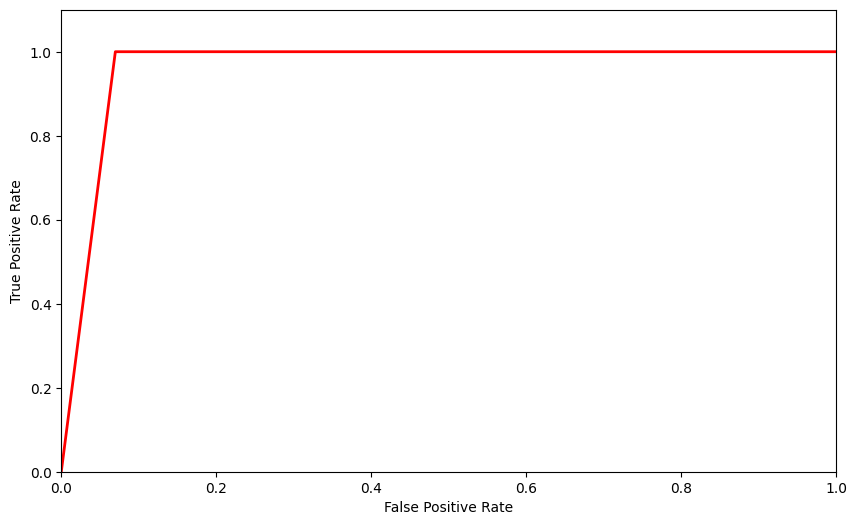

In [16]:
# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(cancer_target_test,cancer_target_pred)
plt.figure(figsize=(10,6))
plt.xlim(0,1)
plt.ylim(0.0,1.1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.savefig('../images/乳腺癌预测ROC曲线.png')
plt.show()